In [ ]:
import pandas as pd

data = pd.read_csv("titanic.train.csv")
df = pd.DataFrame(data)

# Remove columns where the number of missing values is over 20%
df = df.drop(['name', 'home.dest', 'boat', 'cabin', 'ticket'], axis=1)

threshold = len(df) * 0.2
df = df.dropna(thresh=threshold, axis=1)

# Remove rows with any missing values
df = df.dropna()
target_features = df.columns.tolist()

df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,1,male,29.0,0,0,9.5000,S
1,2,1,female,8.0,1,1,26.0000,S
2,1,1,female,22.0,1,0,66.6000,S
3,1,0,male,70.0,1,1,71.0000,S
4,3,1,female,30.0,0,0,6.9500,Q
...,...,...,...,...,...,...,...,...
886,1,0,male,55.0,1,1,93.5000,S
887,3,1,female,24.0,1,0,15.8500,S
888,3,0,male,28.0,0,0,56.4958,S
889,3,0,male,38.5,0,0,7.2500,S


In [ ]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'sibsp', 'embarked'])
df

,pclass,survived,age,parch,fare,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,embarked_C,embarked_Q,embarked_S
0,3,1,29.0,0,9.5000,0,1,1,0,0,0,0,0,0,0,1
1,2,1,8.0,1,26.0000,1,0,0,1,0,0,0,0,0,0,1
2,1,1,22.0,0,66.6000,1,0,0,1,0,0,0,0,0,0,1
3,1,0,70.0,1,71.0000,0,1,0,1,0,0,0,0,0,0,1
4,3,1,30.0,0,6.9500,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,55.0,1,93.5000,0,1,0,1,0,0,0,0,0,0,1
887,3,1,24.0,0,15.8500,1,0,0,1,0,0,0,0,0,0,1
888,3,0,28.0,0,56.4958,0,1,1,0,0,0,0,0,0,0,1
889,3,0,38.5,0,7.2500,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
y_train = df['survived']

# Dropping the target column from the DataFrame to create X_train
X_train = df.drop('survived', axis=1)

In [ ]:
data_test = pd.read_csv("titanic.test.csv")

df_test = pd.DataFrame(data_test)

# Remove columns where the number of missing values is over 20%
# Keeping only specific columns
df_test = df_test[target_features]
df_test


# Remove rows with any missing values
df_test = df_test.dropna()


# Perform one-hot encoding
df_test = pd.get_dummies(df_test, columns=['sex', 'sibsp', 'embarked'])
df_test

,pclass,survived,age,parch,fare,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,embarked_C,embarked_Q,embarked_S
1,3,0,20.0,0,7.9250,0,1,1,0,0,0,0,0,0,0,0,1
2,3,0,26.0,0,7.8875,0,1,1,0,0,0,0,0,0,0,0,1
3,1,1,35.0,0,57.7500,1,0,0,1,0,0,0,0,0,1,0,0
4,1,0,46.0,0,79.2000,0,1,1,0,0,0,0,0,0,1,0,0
5,1,1,51.0,0,77.9583,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,0,1
414,1,1,36.0,2,120.0000,0,1,0,1,0,0,0,0,0,0,0,1
415,3,0,7.0,1,39.6875,0,1,0,0,0,0,1,0,0,0,0,1
416,1,0,42.0,0,26.5500,0,1,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_test = df_test.drop('sibsp_8', axis=1)
df_test

,pclass,survived,age,parch,fare,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,embarked_C,embarked_Q,embarked_S
1,3,0,20.0,0,7.9250,0,1,1,0,0,0,0,0,0,0,1
2,3,0,26.0,0,7.8875,0,1,1,0,0,0,0,0,0,0,1
3,1,1,35.0,0,57.7500,1,0,0,1,0,0,0,0,1,0,0
4,1,0,46.0,0,79.2000,0,1,1,0,0,0,0,0,1,0,0
5,1,1,51.0,0,77.9583,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1
414,1,1,36.0,2,120.0000,0,1,0,1,0,0,0,0,0,0,1
415,3,0,7.0,1,39.6875,0,1,0,0,0,0,1,0,0,0,1
416,1,0,42.0,0,26.5500,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
y_test = df_test['survived']

# Dropping the target column from the DataFrame to create X_train
X_test = df_test.drop('survived', axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a logistic regression model instance
logreg = LogisticRegression(verbose=0)

# Fit the model with training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.792507204610951
Confusion Matrix:
 [[186  35]
 [ 37  89]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

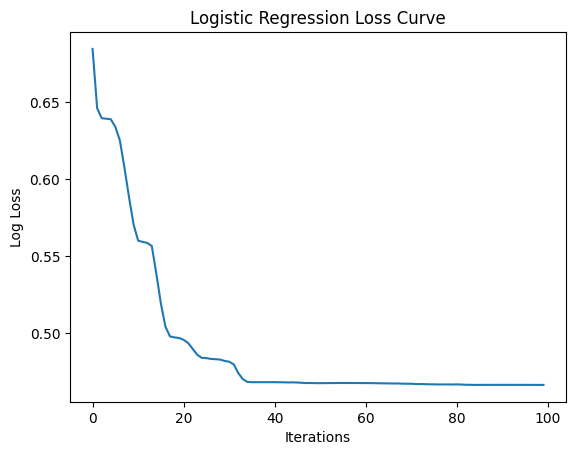

In [ ]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

logreg = LogisticRegression(verbose=0)

# List to store the loss values
loss_values = []

# Iteratively train the model and calculate log loss
for i in range(100):
    logreg.max_iter = i + 1  # Increment max_iter
    logreg.fit(X_train, y_train)

    # Predict probabilities
    probabilities = logreg.predict_proba(X_train)

    # Calculate log loss and store
    loss = log_loss(y_train, probabilities)
    loss_values.append(loss)

# Plotting the loss curve
plt.plot(loss_values)
plt.title('Logistic Regression Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.show()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score

In [ ]:
# Neural Network Model
model_nn = Sequential()
model_nn.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(8, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluate on test set
_, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)
print(f'Neural Network Test Accuracy: {accuracy_nn*100:.2f}%')



Neural Network Test Accuracy: 81.56%
